# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fiki Syihab Irawan
- **Email:** fikiruztiez@gmail.com
- **ID Dicoding:** fikisyihab72

## Menentukan Pertanyaan Bisnis

- Bagaimana performa peminjaman sepeda tahun 2011 dan 2012 berdasarkan musim?
- Berapa presentase perbandingan jumlah peminjam casual dan registered tahun 2011 dan 2012?
- Bagaimana hubungan jumlah peminjaman sepeda berdasarkan cuaca?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
# memuat data csv dengan pandas
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')


In [4]:
# menampilkan data day 5 teratas
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# menampilkan data hour 5 teratas
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : libur atau tidak
- weekday : hari dalam seminggu
- workingday : jika hari tersebut bukan hari libur atau akhir pekan nilainya 1, selain itu nilainya 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Suhu yang dinormalkan dalam Celcius. Nilai dibagi menjadi 41 (maks)
- atemp: Suhu perasaan yang dinormalkan dalam Celcius. Nilai dibagi menjadi 50 (maks)
- hum: Kelembaban yang dinormalkan. Nilai dibagi menjadi 100 (maks)
- windspeed: Kecepatan angin yang dinormalkan. Nilai dibagi menjadi 67 (maks)
- casual: jumlah peminjam kasual
- registered: jumlah peminjam terdaftar
- cnt: jumlah total peminjam casual dan registered

### Assessing Data

In [6]:
# menampilkan struktur data day
struktur_data_day = df_day.info()
print(struktur_data_day)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [7]:
# menampilkan struktur data hour
struktur_data_hour = df_hour.info()
print(struktur_data_hour)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [8]:
# checking data null pada data day
print("Melihat apakah Data Day ada yang null:")
print(df_day.isnull().sum())

Melihat apakah Data Day ada yang null:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# checking data null pada data hour
print("Melihat apakah Data Hour ada null:")
print(df_hour.isnull().sum())

Melihat apakah Data Hour ada null:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# checking apakah ada duplikasi data
print("Melihat apakah Data Day ada terdapat duplikat:")
print(df_day.duplicated().sum())
print("Melihat apakah Data Hour ada terdapat duplikat:")
print(df_hour.duplicated().sum())

Melihat apakah Data Day ada terdapat duplikat:
0
Melihat apakah Data Hour ada terdapat duplikat:
0


**Insight:**
- Terdapat kesalahan tipe data dteday yaitu object yang perlu untuk diganti
- Baik Data Day dan Data Hour tidak terdapat null value
- Baik Data Day dan Data Hour tidak terdapat duplikasi data

### Cleaning Data

In [11]:
# Mengubah tipe data dteday menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [12]:
# memastikan bahwa dteday sudah berubah tipe
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
# memastikan bahwa dteday sudah berubah tipe
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah tipe data dteday menjadi datetime baik pada Data Day dan Data Hour

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
df_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
# mengambil data khusus tahun 2012 untuk keperluan visualisasi
df_2012 = df_day[df_day['dteday'].dt.year == 2012]

In [17]:
df_2012.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [18]:
# mengambil data khusus tahun 2011 untuk keperluan visualisasi
df_2011 = df_day[df_day['dteday'].dt.year == 2011]

In [19]:
df_2011.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
# menambahkan label musim pada data 2011
label_musim = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}
df_2011['label_musim'] = df_2011['season'].replace(label_musim)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\97762812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['label_musim'] = df_2011['season'].replace(label_musim)


In [21]:
df_2011.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,label_musim
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer


In [22]:
# menambahkan label musim pada data 2012
label_musim = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}
df_2012['label_musim'] = df_2012['season'].replace(label_musim)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3000\641712539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['label_musim'] = df_2012['season'].replace(label_musim)


In [23]:
df_2012.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,label_musim
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294,Springer
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951,Springer
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236,Springer
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368,Springer
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272,Springer


In [24]:
# grouping data 2011 berdasarkan musim
df_2011_group_by_musim = df_2011.groupby('label_musim')['cnt'].sum().reset_index()
# urutan musim
season_order = ['Springer', 'Summer', 'Fall', 'Winter']

# Mengatur label_musim sebagai kategori dengan urutan yang ditentukan
df_2011_group_by_musim['label_musim'] = pd.Categorical(df_2011_group_by_musim['label_musim'], categories=season_order, ordered=True)
df_2011_group_by_musim = df_2011_group_by_musim.sort_values('label_musim')


In [25]:
df_2011_group_by_musim.head()

,label_musim,cnt
1,Springer,150000
2,Summer,347316
0,Fall,419650
3,Winter,326137


In [26]:
# grouping data 2012 berdasarkan musim
df_2012_group_by_musim = df_2012.groupby('label_musim')['cnt'].sum().reset_index()
# urutan musim
season_order = ['Springer', 'Summer', 'Fall', 'Winter']

# Mengatur label_musim sebagai kategori dengan urutan yang ditentukan
df_2012_group_by_musim['label_musim'] = pd.Categorical(df_2012_group_by_musim['label_musim'], categories=season_order, ordered=True)
df_2012_group_by_musim = df_2012_group_by_musim.sort_values('label_musim')

In [27]:
df_2012_group_by_musim.head()

,label_musim,cnt
1,Springer,321348
2,Summer,571273
0,Fall,641479
3,Winter,515476


**Insight:**
- Melakukan Exploratory Data Analysis (EDA) yaitu membagi data menjadi tahun 2011 dan 2012 dan menambahkan label musim

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa peminjaman sepeda tahun 2011 dan 2012 berdasarkan musim?


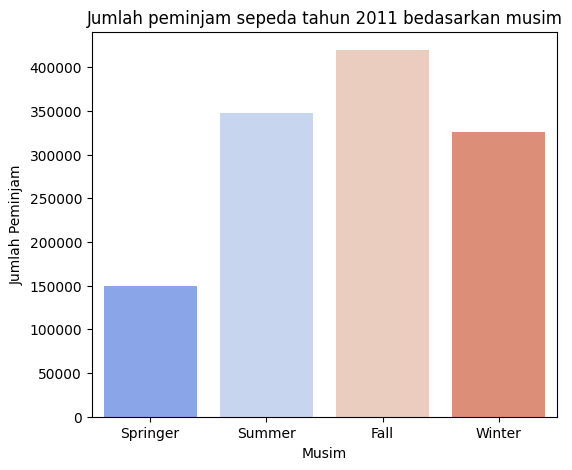

In [28]:
# menampilkan bar plot peminjaman sepeda tahun 2011
plt.figure(figsize=(6, 5))
sns.barplot(x='label_musim', y='cnt', data=df_2011_group_by_musim, hue='label_musim', palette="coolwarm")
plt.title("Jumlah peminjam sepeda tahun 2011 bedasarkan musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjam")
plt.show()

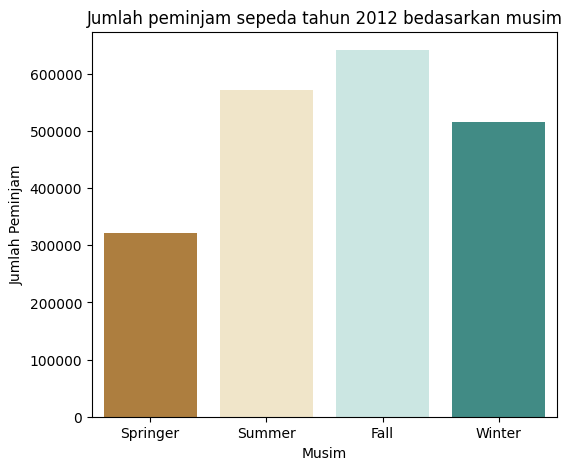

In [29]:
# menampilkan bar plot peminjaman sepeda tahun 2012
plt.figure(figsize=(6, 5))
sns.barplot(x='label_musim', y='cnt', data=df_2012_group_by_musim, hue='label_musim', palette="BrBG")
plt.title("Jumlah peminjam sepeda tahun 2012 bedasarkan musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjam")
plt.show()

### Pertanyaan 2: Berapa presentase perbandingan jumlah peminjam casual dan registered tahun 2011 dan 2012?


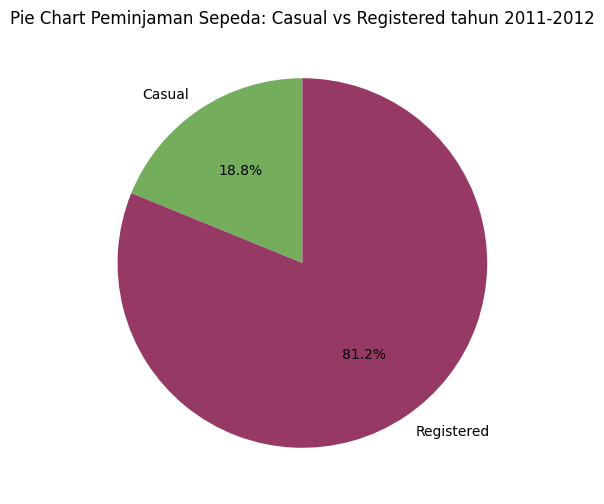

In [30]:
# menamplikan visualisasi pie chart casual vs registered
jumlah_casual = df_day['casual'].sum()
jumlah_registered = df_day['registered'].sum()

labels = ['Casual', 'Registered']
ukuran = [jumlah_casual, jumlah_registered]
warna = ['#74ad5c', '#963965']

plt.figure(figsize=(6, 6))
plt.pie(ukuran, labels=labels, autopct='%1.1f%%', startangle=90, colors=warna)
plt.title('Pie Chart Peminjaman Sepeda: Casual vs Registered tahun 2011-2012')
plt.show()

### Pertanyaan 3: Bagaimana hubungan jumlah peminjaman sepeda berdasarkan cuaca?

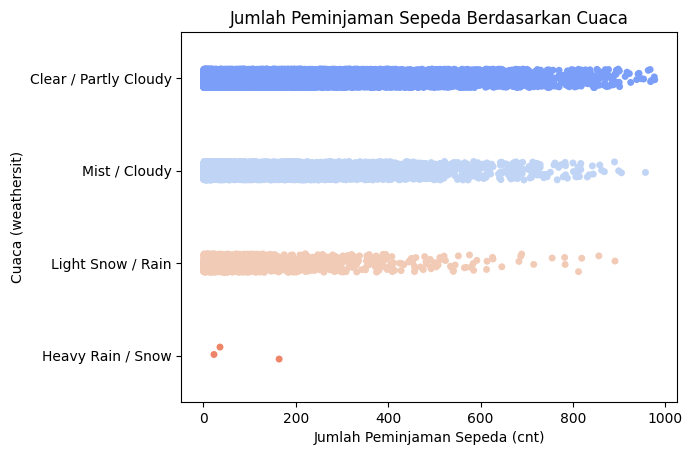

In [31]:
# menampilkan visualisasi jumlah peminjaman sepeda berdasarkan cuaca

# Membuat dictionary mapping untuk menyederhanakan label weathersit
weather_map = {
    1: 'Clear / Partly Cloudy',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Rain',
    4: 'Heavy Rain / Snow'
}

# Menyederhanakan label weathersit dengan mengganti berdasarkan dictionary mapping
df_hour['weathersit_label'] = df_hour['weathersit'].map(weather_map)

# Membuat scatter plot dengan label cuaca yang sudah disingkat
sns.stripplot(x='cnt', y='weathersit_label', data=df_hour, jitter=True, hue='weathersit_label', palette="coolwarm")

# Menambahkan label sumbu dan judul
plt.xlabel('Jumlah Peminjaman Sepeda (cnt)')
plt.ylabel('Cuaca (weathersit)')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca')

# Menampilkan plot
plt.show()

**Insight:**
- Menambahkan 3 Visualisasi untuk 3 pertanyaan bisnis yang sudah ditentukan sebelumnya

## Analisis Lanjutan (Opsional)

In [32]:
# Analsis lanjutan Clustering
# Mengelompokkan data peminjam casual dan registered berdasarkan musim untuk dibandingkan

df_musim_group = df_day[['season', 'casual', 'registered']]

# Mengelompokkan data berdasarkan musim dan menghitung jumlah peminjam casual dan registered
df_casual_registered_group = df_musim_group.groupby('season')[['casual', 'registered']].sum().reset_index()

# Mapping season ke nama musim
season_map = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

df_casual_registered_group['season'] = df_casual_registered_group['season'].map(season_map)

# Menampilkan hasil
print(df_casual_registered_group)

     season  casual  registered
0  Springer   60622      410726
1    Summer  203522      715067
2      Fall  226091      835038
3    Winter  129782      711831


**Insight:**
- Dari hasil pengelompokan diatas, didapatkan bahwa baik pengguna casual dan registered paling banyak meminjam sepeda pada musim gugur (Fall)

## Conclusion

- Conclution pertanyaan 1: Dari tahun 2011 dan 2012 musim gugur (Fall) menjadi musim dengan jumlah peminjaman sepeda tertinggi. Berdasarkan perbandingan tahun 2011 dan 2012 semua musim yaitu Springer, Summer, Fall, dan Winter terjadi peningkatan jumlah peminjaman. Dapat disimpulkan bahwa secara keseluruhan terdapat peningkatan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012
- Conclution pertanyaan 2: Berdasarkan hasil explorasi data yang telah dilakukan, presentase peminjam registered lebih banyak dibandingan peminjam casual dengan nilai 81.2% (registered) dan 18.8% (casual)
- Conclution pertanyaan 3: Berdasarkan hasil scatterplot yang telah divisualisasikan, terdapat pengaruh antara jumlah peminjam sepeda dengan cuaca. Urutan jumlah peminjam sepeda berdasarkan cuaca adalah Clear / Partly Cloudy urutan pertama, Mist / Cloudy urutan kedua, Light Snow / Rain urutan ketiga, dan urutan keempat. Hasil ini menunjukan bahwa cuaca cerah menjadi paling banyak terjadi peminjaman sepeda dan semakin buruk cuaca semakin sedikit pula jumlah peminjaman sepeda

In [ ]:
#df_2011_group_by_musim.to_csv("df_2011_group_by_musim.csv", index=False)
#df_2012_group_by_musim.to_csv("df_2012_group_by_musim.csv", index=False)
#df_day.to_csv("df_day.csv", index=False)
#df_hour.to_csv("df_hour.csv", index=False)